# Test DBScan Implementation

#### Used Libraries Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
from sklearn.decomposition import PCA

#### Used Dataset Importation

In [9]:
dataf = pd.read_csv("wine_cultivar_classification.csv", header=0)
dataf.pop('class')
dataf.head()

,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Totalphenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity,Hue,OD280OD315ofdilutedwines,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


#### PCA projection

In [10]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataf)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,3.307421,-1.439402
1,2.203250,0.332455
2,2.509661,-1.028251
3,3.746497,-2.748618
4,1.006070,-0.867384


In [11]:
xd = principalDf.values.tolist()

#### Implementation

In [12]:
def getN(xtot, xi, eps):
    Nb = []
    for xj in xtot:
        dist = m.dist(xi,xj)
        if dist <= eps and dist != 0:
            Nb.append(xj)
    return Nb

In [13]:
def DBscan(xdata,e,minp):
    K=0
    cores = []
    label = []
    for i in range(len(xdata)):
        label.append('Noise')

    for i in range (len(xdata)):
        Nbxi = getN(xdata, xdata[i], e)
        if len(Nbxi) >= (minp-1) :
            cores.append(xdata[i])

    for c in cores:
        i = xdata.index(c)
        if label[i] == 'Noise':
            K+=1
            label[i] = K
            Nbci = getN(xdata, c, e)
            Rs = Nbci
            while Rs:
                r = Rs[-1]
                j=xdata.index(r)
                Rs.pop()
                if label[j] == 'Noise':
                    label[j] = K
                    if r in cores:
                        Nr = getN(xdata,r,e)
                        Rs += Nr
    return label

In [18]:
#Hyper-parameters:
epsilon = 0.55
MinPoint = 4

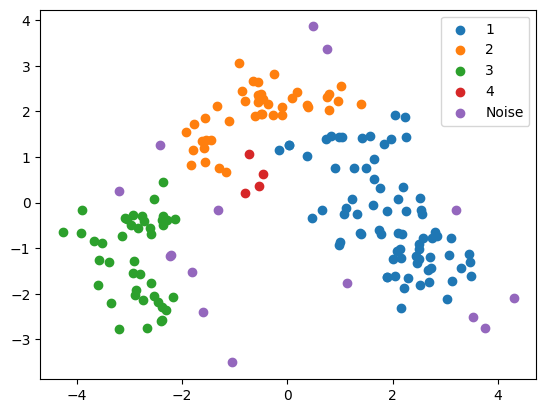

In [19]:
label = DBscan(xd,epsilon,MinPoint)

scatterpt = np.asarray(xd)
group = np.asarray(label)
fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatterpt[:,0][ix], scatterpt[:,1][ix], label=g)
ax.legend()
plt.show()